In [1]:
import sys
import dataloading
import sensors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import plotly.graph_objects as go
import seaborn as sns
from scipy.spatial.transform import Rotation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn import model_selection

### load dataset1

In [2]:
df = dataloading.load_data1()
df = df.drop(columns=['cos'])
df = df.drop(columns=['AG-X'])
df = df.drop(columns=['AG-Y'])
df = df.drop(columns=['AG-Z'])
df = df.drop(columns=['RV-X'])
df = df.drop(columns=['RV-Y'])
df = df.drop(columns=['RV-Z'])

X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df,test_size=0.2)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

df.head()

X_train: (75358, 9), y_train: (75358,), X_test: (18840, 9), y_test: (18840,)


,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,activity
0,-1.684995,0.401508,1.334339,-8.855526,4.199663,-0.335983,-0.762366,-0.750471,1.109060,Running
1,-0.895032,-1.936677,1.436671,-8.399648,5.060810,0.067106,-0.613229,-0.121966,1.906942,Running
2,2.350318,-3.642859,-1.169414,-7.911231,5.790931,0.218930,-0.142383,-0.352063,1.759936,Running
3,0.812825,-0.722664,-0.334024,-7.523226,6.280006,0.364660,-0.148775,-0.382955,1.208129,Running
4,0.349670,-0.468074,-0.378780,-6.921238,6.909286,0.727059,-1.047857,0.379773,0.828895,Running


In [3]:
print(labels)

['Running' 'Sitting' 'Standing' 'Walking' 'downstaires' 'upstaires']


In [4]:
fs = 12
window_size = int(1 * fs)

### Test running samples

In [5]:
data_path = "/Users/admin/Desktop/sensors/data/" + "running_1"

acc_df, gravity_df, rot_rate_df, orientation_df = sensors.read_android_logger_sensor_data(data_path)
test_data_df = sensors.to_data1_df(sensors.take_df_subset(acc_df, 0.15, 0.15), sensors.take_df_subset(gravity_df, 0.15, 0.15), sensors.take_df_subset(rot_rate_df, 0.15, 0.15), sensors.take_df_subset(orientation_df, 0.15, 0.15), fs, window_size)

label_type = 'Running'
label_index = np.where(labels == label_type)[0][0]
real_test_labels = np.full((test_data_df.shape[0]), label_index)
test_df = pd.concat([test_data_df, pd.DataFrame({'activity':real_test_labels})], axis=1).dropna()
test_df.head()

,x,y,z,x,y,z,x,y,z,activity
0,0.923937,-0.608709,-0.712249,-2.427312,-9.335273,0.269466,0.067278,0.518040,-0.493983,0
1,0.143598,0.501865,-0.539460,1.811944,-8.888627,-0.305744,-0.147705,0.318891,-1.174509,0
2,2.280383,-1.161300,0.233469,3.133447,-8.796761,0.128995,-0.144543,0.271276,-1.093870,0
3,2.247874,-1.050276,-2.451743,2.601752,-8.974565,1.071895,0.267692,0.431421,0.955353,0
4,-3.228610,1.225368,-1.678719,4.105658,-8.554083,0.929264,0.323263,0.359904,-0.192857,0


In [6]:
X_train_real, y_train_real, X_test_real, y_test_real,_ = dataloading.train_test_split(test_df,test_size=0.95, scaler_type="standard",should_map_labels=False)
print(f"X_train: {X_train_real.shape}, y_train: {y_train_real.shape}, X_test: {X_test_real.shape}, y_test: {y_test_real.shape}")

X_train: (1, 9), y_train: (1,), X_test: (25, 9), y_test: (25,)


In [7]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test_real,y_test_real),max_clients=1)
dataloading.save_client_data(client_data,"dataset_1_real_experiment_3")

### Test Walking Upstairs

In [8]:
data_path = "/Users/admin/Desktop/sensors/data/" + "upstairs"

acc_df, gravity_df, rot_rate_df, orientation_df = sensors.read_android_logger_sensor_data(data_path)
test_data_df = sensors.to_data1_df(sensors.take_df_subset(acc_df, 0.15, 0.15), sensors.take_df_subset(gravity_df, 0.15, 0.15), sensors.take_df_subset(rot_rate_df, 0.15, 0.15), sensors.take_df_subset(orientation_df, 0.15, 0.15), fs, window_size)

label_type = 'upstaires'
label_index = np.where(labels == label_type)[0][0]
real_test_labels = np.full((test_data_df.shape[0]), label_index)
test_df = pd.concat([test_data_df, pd.DataFrame({'activity':real_test_labels})], axis=1).dropna()
test_df.head()

,x,y,z,x,y,z,x,y,z,activity
0,-0.719437,-1.042747,-0.209676,4.126236,-8.591975,0.360408,-0.433196,0.689359,-0.394691,5
1,-0.723160,-0.446901,-0.150859,3.182753,-9.071331,0.311227,-0.145830,0.187431,0.914984,5
2,-0.862350,-1.532977,0.173954,4.205416,-8.501626,-0.066904,0.011019,0.112685,0.390230,5
3,0.705939,-1.115512,0.192954,3.659652,-8.720223,-0.015413,-0.498100,0.286190,-1.118094,5
4,0.035933,-0.339952,0.738417,3.810185,-8.713553,0.251556,-0.436348,0.598301,-0.365130,5


In [9]:
X_train_real, y_train_real, X_test_real, y_test_real,_ = dataloading.train_test_split(test_df,test_size=0.95, scaler_type="standard",should_map_labels=False)
print(f"X_train: {X_train_real.shape}, y_train: {y_train_real.shape}, X_test: {X_test_real.shape}, y_test: {y_test_real.shape}")

client_data = dataloading.to_client(data=(X_train,y_train,X_test_real,y_test_real),max_clients=1)
dataloading.save_client_data(client_data,"dataset_1_real_experiment_2")

X_train: (2, 9), y_train: (2,), X_test: (43, 9), y_test: (43,)


### Test Standing

In [20]:
data_path = "/Users/admin/Desktop/sensors/data/" + "standing_1"

acc_df, gravity_df, rot_rate_df, orientation_df = sensors.read_android_logger_sensor_data(data_path)
test_data_df = sensors.to_data1_df(sensors.take_df_subset(acc_df, 0.15, 0.15), sensors.take_df_subset(gravity_df, 0.15, 0.15), sensors.take_df_subset(rot_rate_df, 0.15, 0.15), sensors.take_df_subset(orientation_df, 0.15, 0.15))

label_type = 'Standing'
label_index = np.where(labels == label_type)[0][0]
real_test_labels = np.full((test_data_df.shape[0]), label_index)
test_df = pd.concat([test_data_df, pd.DataFrame({'activity':real_test_labels})], axis=1).dropna()
test_df.head()

,x,y,z,x,y,z,x,y,z,activity
62,-0.004986,-0.023279,0.065284,0.813132,9.772881,0.002758,0.458862,-0.826112,-1.073120,2.0
63,0.095354,-0.008367,0.026289,0.831840,9.771305,-0.004882,0.170975,-0.636895,0.169111,2.0
64,0.076374,0.001204,-0.015181,0.846012,9.770088,-0.004384,0.519050,-1.194161,1.904558,2.0
65,0.021597,-0.014959,-0.053580,0.853439,9.769444,0.001212,0.134223,-0.074302,3.523759,2.0
66,-0.014122,0.003493,-0.048923,0.857167,9.769116,0.004740,-0.535162,1.035969,2.492317,2.0


In [5]:
X_train_real, y_train_real, X_test_real, y_test_real,_ = dataloading.train_test_split(test_df,test_size=0.99, scaler_type="standard",should_map_labels=False)
print(f"X_train: {X_train_real.shape}, y_train: {y_train_real.shape}, X_test: {X_test_real.shape}, y_test: {y_test_real.shape}")

client_data = dataloading.to_client(data=(X_train,y_train,X_test_real,y_test_real),max_clients=1)
dataloading.save_client_data(client_data,"dataset_1_real_experiment_1")

X_train: (1, 9), y_train: (1,), X_test: (144, 9), y_test: (144,)


### Test Walking Downstairs

In [7]:
data_path = "/Users/admin/Desktop/sensors/data/" + "downstairs"

acc_df, gravity_df, rot_rate_df, orientation_df = sensors.read_android_logger_sensor_data(data_path)
test_data_df = sensors.to_data1_df(sensors.take_df_subset(acc_df, 0.15, 0.15), sensors.take_df_subset(gravity_df, 0.15, 0.15), sensors.take_df_subset(rot_rate_df, 0.15, 0.15), sensors.take_df_subset(orientation_df, 0.15, 0.15))

label_type = 'downstaires'
label_index = np.where(labels == label_type)[0][0]
real_test_labels = np.full((test_data_df.shape[0]), label_index)
test_df = pd.concat([test_data_df, pd.DataFrame({'activity':real_test_labels})], axis=1).dropna()
test_df.head()

,x,y,z,x,y,z,x,y,z,activity
92,2.775711,-2.861990,0.860132,6.025092,-7.684917,-0.900401,-0.015047,0.676043,-0.371244,4.0
93,-2.350569,0.406504,-0.529011,5.918866,-7.817934,-0.131593,0.239019,-1.989779,0.297342,4.0
94,1.454839,2.361367,0.345020,5.593625,-8.047561,-0.344270,0.421711,-1.464338,0.512259,4.0
95,0.740166,2.887135,0.890234,5.610312,-8.026894,-0.513603,1.353684,0.520914,0.551141,4.0
96,3.261690,0.933964,2.577382,5.467564,-8.097871,-0.837042,1.057008,1.389903,0.434494,4.0


In [9]:
X_train_real, y_train_real, X_test_real, y_test_real,_ = dataloading.train_test_split(test_df,test_size=0.99, scaler_type="standard",should_map_labels=False)
print(f"X_train: {X_train_real.shape}, y_train: {y_train_real.shape}, X_test: {X_test_real.shape}, y_test: {y_test_real.shape}")

client_data = dataloading.to_client(data=(X_train,y_train,X_test_real,y_test_real),max_clients=1)
dataloading.save_client_data(client_data,"dataset_1_real_experiment_2")

X_train: (2, 9), y_train: (2,), X_test: (212, 9), y_test: (212,)


### TEST

In [8]:
data_path = "/Users/admin/Desktop/sensors/data/" + "upstairs"
fs = 12
window_size = int(1 * fs)
acc_df, gravity_df, rot_rate_df, orientation_df = sensors.read_android_logger_sensor_data(data_path)
test_data_df = sensors.to_data1_df(sensors.take_df_subset(acc_df, 0.15, 0.15), sensors.take_df_subset(gravity_df, 0.15, 0.15), sensors.take_df_subset(rot_rate_df, 0.15, 0.15), sensors.take_df_subset(orientation_df, 0.15, 0.15),fs,window_size)

label_type = 'upstaires'
label_index = np.where(labels == label_type)[0][0]
real_test_labels = np.full((test_data_df.shape[0]), label_index)
test_df = pd.concat([test_data_df, pd.DataFrame({'activity':real_test_labels})], axis=1).dropna()
test_df = test_df.drop(columns=['activity'])
test_df.head()

,x,y,z,x,y,z,x,y,z
0,-0.719437,-1.042747,-0.209676,4.126236,-8.591975,0.360408,-0.433196,0.689359,-0.394691
1,-0.723160,-0.446901,-0.150859,3.182753,-9.071331,0.311227,-0.145830,0.187431,0.914984
2,-0.862350,-1.532977,0.173954,4.205416,-8.501626,-0.066904,0.011019,0.112685,0.390230
3,0.705939,-1.115512,0.192954,3.659652,-8.720223,-0.015413,-0.498100,0.286190,-1.118094
4,0.035933,-0.339952,0.738417,3.810185,-8.713553,0.251556,-0.436348,0.598301,-0.365130


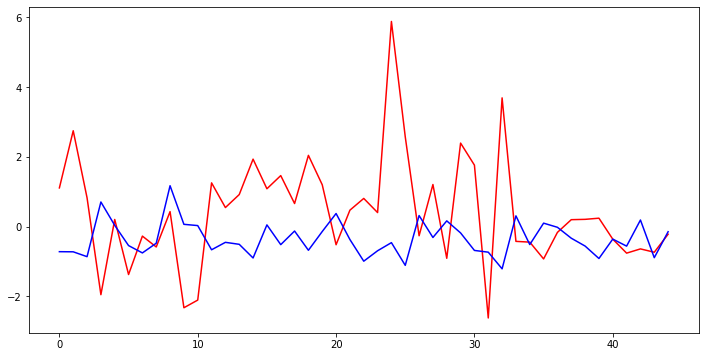

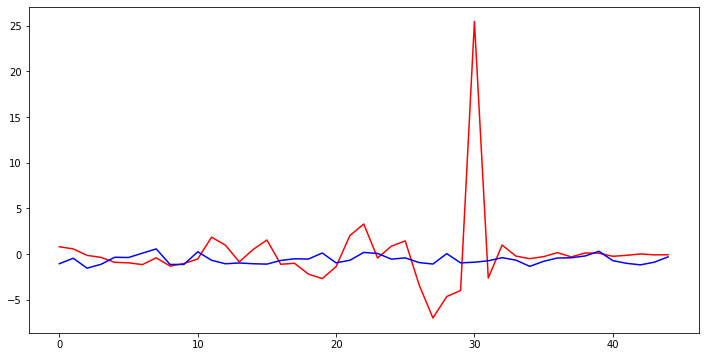

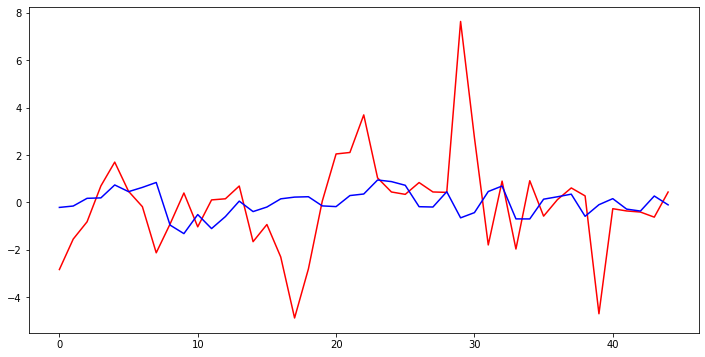

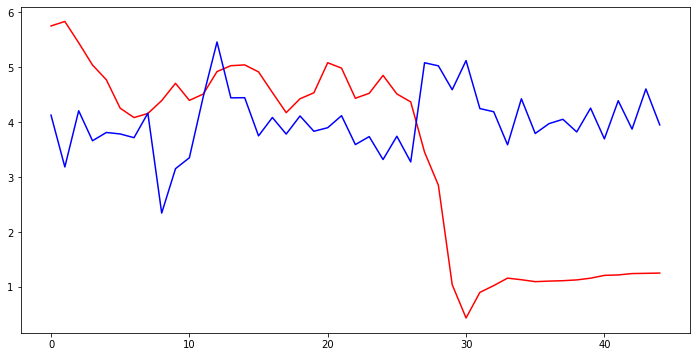

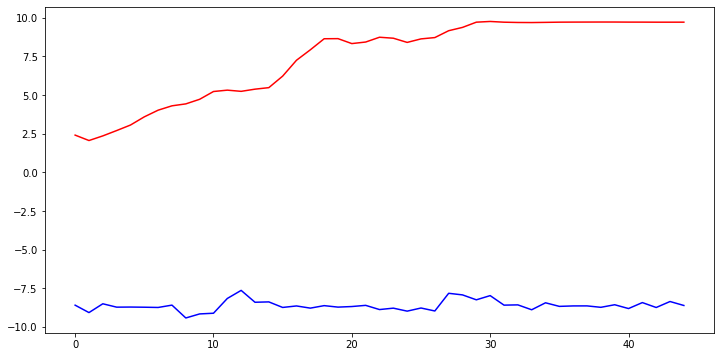

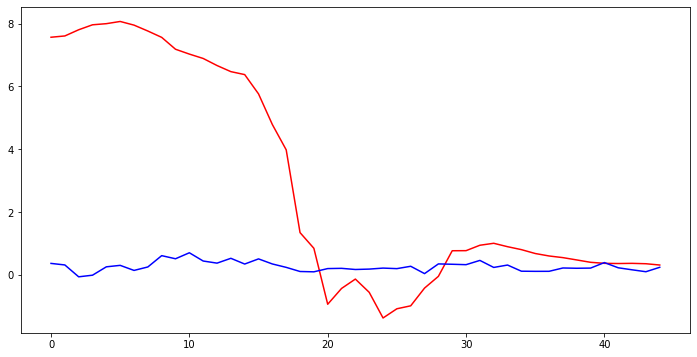

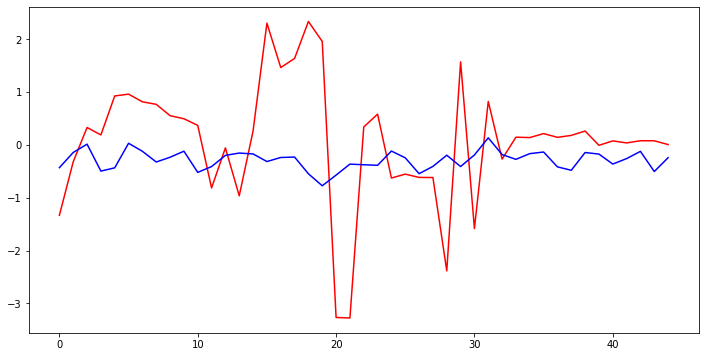

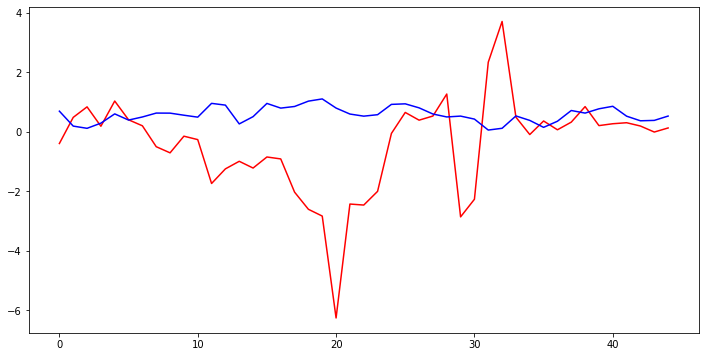

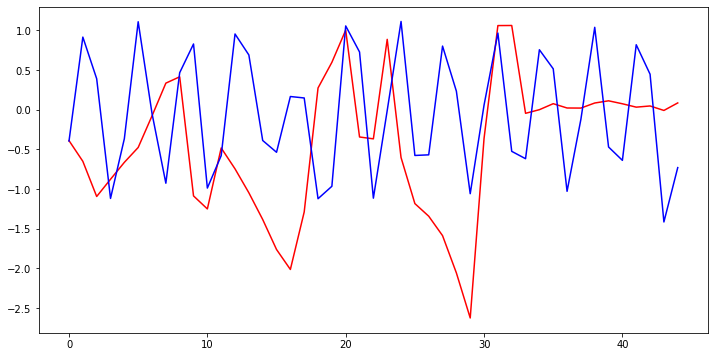

In [23]:
walking_data = df[df['activity'] == 'upstaires'].to_numpy()
real_data = test_df.to_numpy()


for idx in range(X_train.shape[1]):
    plt.figure(figsize=[12,6])
    plt.plot(walking_data[0:real_data.shape[0], idx], color='r')
    plt.plot(real_data[:, idx], color='b')